# Unsupervised Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#What-the-PCA-does?" data-toc-modified-id="What-the-PCA-does?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>What the PCA does?</a></span></li><li><span><a href="#Use-of-PCA" data-toc-modified-id="Use-of-PCA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Use of PCA</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#KMeans" data-toc-modified-id="KMeans-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>KMeans</a></span></li><li><span><a href="#Silhouette-Score" data-toc-modified-id="Silhouette-Score-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Silhouette Score</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DBSCAN</a></span></li></ul></li><li><span><a href="#Practical-clustering-example" data-toc-modified-id="Practical-clustering-example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Practical clustering example</a></span><ul class="toc-item"><li><span><a href="#Preparing-Data" data-toc-modified-id="Preparing-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing Data</a></span></li><li><span><a href="#Modeling-our-data" data-toc-modified-id="Modeling-our-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modeling our data</a></span></li><li><span><a href="#Elbow-test" data-toc-modified-id="Elbow-test-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Elbow test</a></span></li></ul></li><li><span><a href="#Further-Resources" data-toc-modified-id="Further-Resources-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Further Resources</a></span></li></ul></div>

## Principal Component Analysis

### PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../datasets/pca.csv", index_col=0)
data.head()

,x,y,label
0,0.082278,-0.098055,red
1,-0.437699,0.680377,red
2,-0.596248,1.028075,red
3,-0.678218,1.284510,red
4,-0.509880,1.242641,red


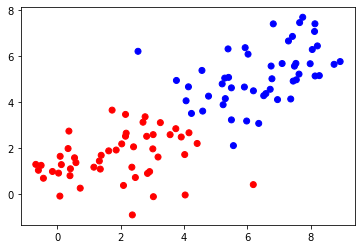

In [3]:
plt.scatter(data["x"],data["y"], c=data["label"]);

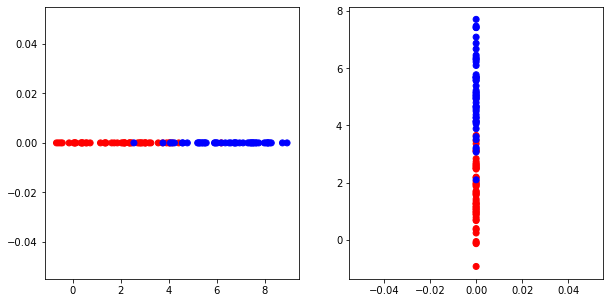

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data["x"],[0 for _ in range(data.shape[0])], c=data["label"])
plt.subplot(1,2,2)
plt.scatter([0 for _ in range(data.shape[0])],data["y"], c=data["label"]);

When we hace a distribution of datapoints, each variable will explain some of the variance of the data. But the variables we have not always do the best job at it. It is natural.

### What the PCA does?

**Find the center point of our data**

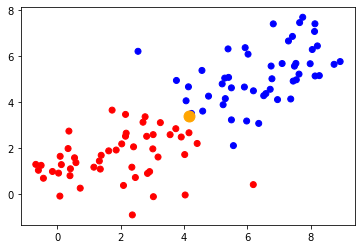

In [5]:
cx, cy = data["x"].mean(), data["y"].mean()
plt.scatter(data["x"],data["y"], c=data["label"])
plt.scatter(cx,cy, c="orange", s=120);

**Move the data so it is centered on the origin of the axes and has a standard deviation of 1 (Standardize)**

In [6]:
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data[["x","y"]]), columns=["x","y"])
data_scale.head()

,x,y
0,-1.510611,-1.652257
1,-1.702719,-1.283646
2,-1.761296,-1.119000
3,-1.791580,-0.997570
4,-1.729387,-1.017397


In [7]:
cx, cy = data_scale["x"].mean(), data_scale["y"].mean()
cx, cy

(1.8207657603852566e-16, 2.3980817331903383e-16)

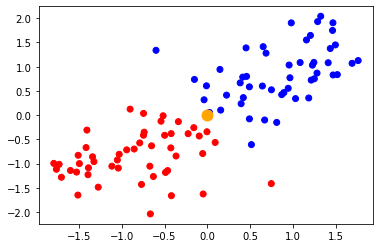

In [8]:
plt.scatter(data_scale["x"],data_scale["y"], c=data["label"])
plt.scatter(cx,cy, c="orange", s=120);

**Find the line that best fits our data**

This line will be our PC1.

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(pd.DataFrame(data_scale["x"]),data_scale["y"])

LinearRegression()

In [10]:
lr.intercept_, lr.coef_

(9.361124946947948e-17, array([0.80294197]))

In [11]:
lin_arr = np.linspace(data_scale["x"].min(),data_scale["x"].max(),100)
pc1 = lin_arr*lr.coef_[0]

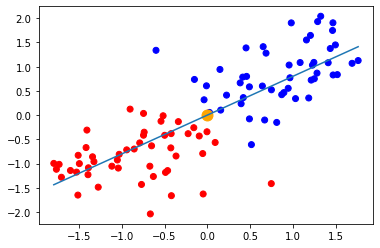

In [12]:
plt.scatter(data_scale["x"],data_scale["y"], c=data["label"])
plt.scatter(cx,cy, c="orange", s=120)
plt.plot(lin_arr,pc1);

**Find a line orthogonal to PC1**

This will be our PC2. If we are talking about more than 2 dimensions, it will be the orthogonal line that best fits our data. And so on with PC3, PC4, etc.

If a line is respresented by $y=mx+b$

The slope of a perpendicular line will be $-1/m$

In [13]:
pc2 = lin_arr*(-1/lr.coef_[0])

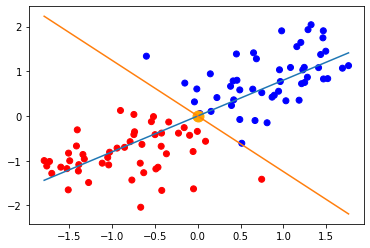

In [14]:
plt.scatter(data_scale["x"],data_scale["y"], c=data["label"])
plt.scatter(cx,cy, c="orange", s=120)
plt.plot(lin_arr,pc1)
plt.plot(lin_arr,pc2);

**Points will be projected into the new axes and have their PC1, PC2 values**

In [15]:
# PCA using Sklearn
from sklearn.decomposition import PCA

In [16]:
pca = PCA(2)
data_transformed = pd.DataFrame(pca.fit_transform(data[["x","y"]]), columns=["x","y"])
data_transformed.head()

,x,y
0,-5.361107,0.388784
1,-5.318860,-0.546389
2,-5.240609,-0.920432
3,-5.154729,-1.175584
4,-5.043916,-1.042127


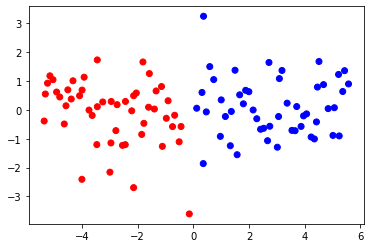

In [17]:
plt.scatter(data_transformed["x"],-data_transformed["y"], c=data["label"])

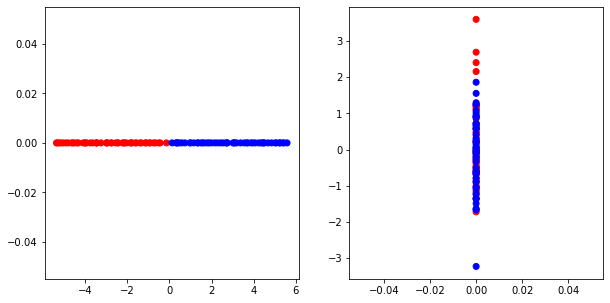

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(data_transformed["x"],[0 for _ in range(data_transformed.shape[0])], c=data["label"])
plt.subplot(1,2,2)
plt.scatter([0 for _ in range(data_transformed.shape[0])],data_transformed["y"], c=data["label"]);

In [19]:
pca.explained_variance_ratio_

array([0.90796189, 0.09203811])

In [20]:
sum(pca.explained_variance_ratio_)

1.0

In [21]:
from sklearn.datasets import load_iris

In [22]:
X,y = load_iris(return_X_y=True)
cols = load_iris()["feature_names"]
labels = load_iris()["target_names"]
data = pd.DataFrame(X,columns=cols)
data["species"] = [labels[i] for i in y]

In [23]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


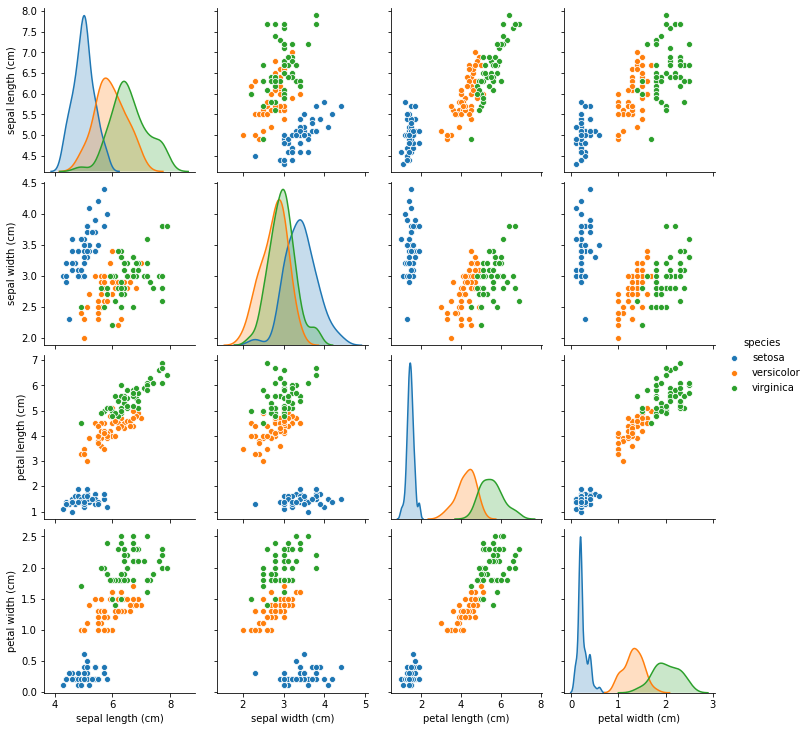

In [24]:
sns.pairplot(data, hue="species")

In [25]:
pca = PCA(2)
iris_t = pd.DataFrame(pca.fit_transform(data.drop(columns=["species"])), columns=["PC1","PC2"])
iris_t["species"] = data["species"]

In [26]:
iris_t.head()

,PC1,PC2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


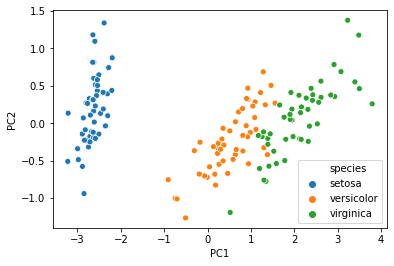

In [27]:
pca_iris = sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=iris_t["species"])

In [28]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [29]:
cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

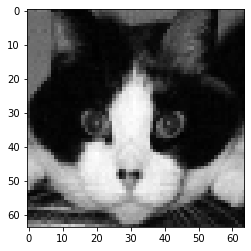

In [30]:
plt.imshow(cats[:,50].reshape(64,64).T, cmap="gray")

In [31]:
cats[:,50].reshape(64,64).T.size * 3

12288

In [32]:
data = np.concatenate([dogs,cats],axis=1).T
y = ["dogs"]*80 + ["cats"]*80

In [33]:
pca = PCA()
data_t = pca.fit_transform(data)

In [34]:
variance_ratios=pca.explained_variance_ratio_

In [35]:
total_features = 64**2
total_features

4096

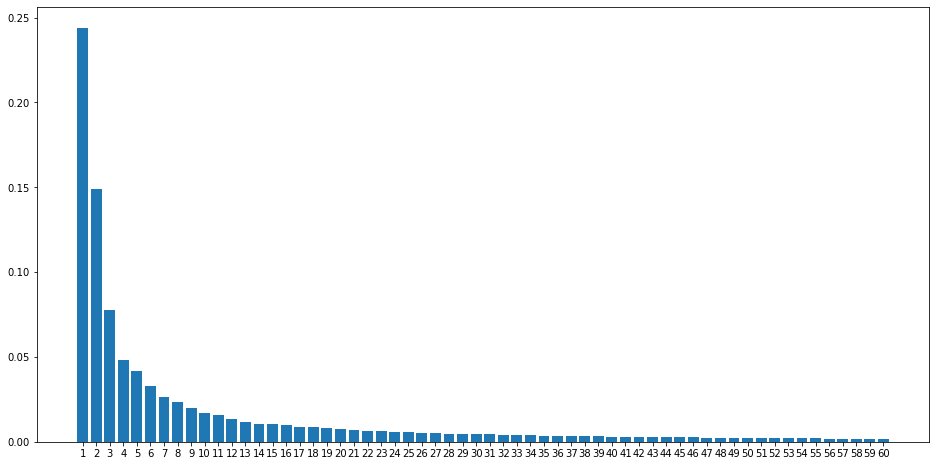

In [36]:
plt.figure(figsize=(16,8))
ratios = variance_ratios[:60]
plt.bar(range(len(ratios)),ratios,tick_label=range(1,len(ratios)+1));

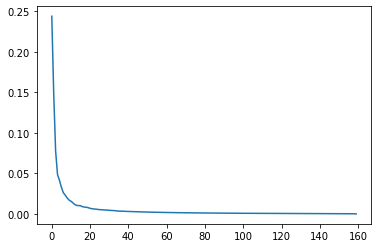

In [37]:
plt.plot(variance_ratios)

### Use of PCA
- The number of (max) Principal Components is equal to the number of variables or the number of data points, whichever is lower.
- Each PC explains part of the variance of the original data
- Always standardize data before PCA. (mean=0, std=1) If using sklearn.preprocessing.PCA, it standardizes for us
- Useful for visualizing problems of high dimension
- Useful for reducing dimensionality

### t-SNE
_t-distributed stochastic neighbor embedding_

- Tool for visualizing high dimensional data

In [38]:
from sklearn.manifold import TSNE

In [39]:
X,y = load_iris(return_X_y=True)
cols = load_iris()["feature_names"]
labels = load_iris()["target_names"]
data = pd.DataFrame(X,columns=cols)
data["species"] = [labels[i] for i in y]

In [40]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, learning_rate=200)

In [41]:
iris_tsne = pd.DataFrame(tsne.fit_transform(data.drop(columns=["species"])))

In [42]:
iris_tsne.head()

,0,1
0,-13.243941,-17.607639
1,-11.843463,-19.882561
2,-11.065455,-19.012989
3,-10.962001,-19.441376
4,-13.066203,-17.285275


**Clusters are much more defined with TSNES than with PCA as shown on both graphs below**

<AxesSubplot:xlabel='0', ylabel='1'>

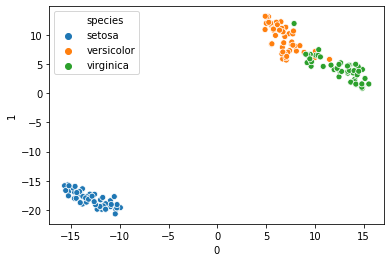

In [43]:
sns.scatterplot(iris_tsne[0],iris_tsne[1], hue=data["species"])

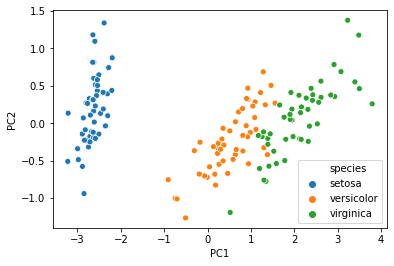

In [44]:
pca_iris.figure

## Clustering

### KMeans

This algorithm divides our data into K clusters by looking for centroids and calculating distances.

In [45]:
from sklearn.cluster import KMeans

In [46]:
df = data.drop(columns=["species"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Since KMeans is distance based** and our variables have very different variances, even if they have the same unit, it is a good idea to standardize the data.

In [47]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [48]:
km = KMeans(n_clusters=3)
km.fit(df)

KMeans(n_clusters=3)

In [49]:
y_pred = km.predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [50]:
cross = pd.crosstab(y_pred, data["species"])
cross

species,setosa,versicolor,virginica
row_0,,,
0,50,0,0
1,0,39,14
2,0,11,36


### Silhouette Score

Silhouette score is a metric of the separation of clusters.

It ranges from -1 to 1, where negative values mean clusters are wrongly asigned, 0 means clusters overlap and 1 means clusters are separated and defined.



In [51]:
from sklearn.metrics import silhouette_score

In [52]:
silhouette_score(df, y_pred)

0.45994823920518635

### DBSCAN

Another algorithm for clustering. We don't define the number of clusters, but rather the maximum distance of a point to another so they are considered on the same cluster. The resulting number of clusters will depend on the data.

On the example below, DBSCAN is unable to separate the two clusters formed by versicolor and virginica, representing both as a single cluster.

In [53]:
from sklearn.cluster import DBSCAN

In [54]:
dbscan = DBSCAN()

In [55]:
dbscan.fit(df)

DBSCAN()

Visualization is PCA data, but labels were calculated with all data:

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

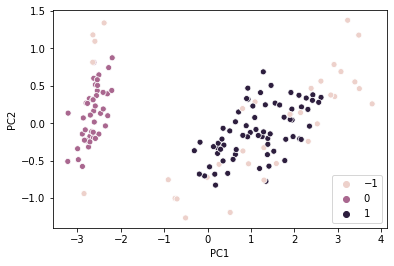

In [56]:
sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=dbscan.labels_)

In [57]:
dbscan = DBSCAN()
dbscan.fit(iris_t.drop(columns=["species"]))

DBSCAN()

Visualization with PCA, data calculated with 2 PC:

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

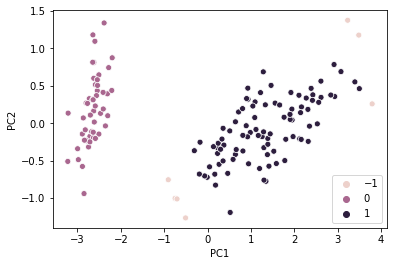

In [58]:
sns.scatterplot(iris_t["PC1"],iris_t["PC2"], hue=dbscan.labels_)

## Practical clustering example

In [59]:
data = pd.read_csv("../datasets/breadbasket.csv")

In [60]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


### Preparing Data

In [61]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [62]:
data.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [63]:
data["Date"]+" "+data["Time"]

0        2016-10-30 09:58:11
1        2016-10-30 10:05:34
2        2016-10-30 10:05:34
3        2016-10-30 10:07:57
4        2016-10-30 10:07:57
                ...         
21288    2017-04-09 14:32:58
21289    2017-04-09 14:32:58
21290    2017-04-09 14:57:06
21291    2017-04-09 14:57:06
21292    2017-04-09 15:04:24
Length: 21293, dtype: object

Let's convert the date and time to an appropriate format.

In [64]:
data["datetime"] = pd.to_datetime(data["Date"]+" "+data["Time"])

In [65]:
data.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [66]:
data.dtypes

Date                   object
Time                   object
Transaction             int64
Item                   object
datetime       datetime64[ns]
dtype: object

In [67]:
data = data.iloc[:,2:]
data.head()

,Transaction,Item,datetime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57


There are many different values for items, encoding them as dummies would result in many features, so we simplify them into categories.

In [68]:
data["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [69]:
groups = {
    "beverage":['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies'],
    "kids":["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit'],
    "snacks":['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars'],
    "bread":['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian'],
    "breakfast_pastry":['Muffin', 'Pastry', 'Medialuna', 'Scone'],
    "dessert":['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone'],
    "condiments":['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil'],
    "breakfast":['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami'],
    "lunch":['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
}

In [70]:
def category(prod, cat=groups):
    for k, v in cat.items():
        if prod in v:
            return k
    return "other"

In [71]:
category("Coffee")

'beverage'

In [72]:
data["category"] = data["Item"].apply(category)

In [73]:
data.head()

,Transaction,Item,datetime,category
0,1,Bread,2016-10-30 09:58:11,bread
1,2,Scandinavian,2016-10-30 10:05:34,bread
2,2,Scandinavian,2016-10-30 10:05:34,bread
3,3,Hot chocolate,2016-10-30 10:07:57,beverage
4,3,Jam,2016-10-30 10:07:57,condiments


In [74]:
data["category"].unique()

array(['bread', 'beverage', 'condiments', 'dessert', 'breakfast_pastry',
       'other', 'kids', 'breakfast', 'lunch', 'snacks'], dtype=object)

**One hot encoding**

In [75]:
breadbasket = pd.get_dummies(data, columns=["category"], prefix="", prefix_sep="")

In [76]:
breadbasket.head()

,Transaction,Item,datetime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
0,1,Bread,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,1,0,0,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,1,0,0,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,1,0,0,0,0,0


**What I was bough on each transaction**

In [77]:
breadbasket.groupby(by="Transaction").agg({"Item":lambda x: list(x)})

,Item
Transaction,
1,[Bread]
2,"[Scandinavian, Scandinavian]"
3,"[Hot chocolate, Jam, Cookies]"
4,[Muffin]
5,"[Coffee, Pastry, Bread]"
...,...
9680,[Bread]
9681,"[Truffles, Tea, Spanish Brunch, Christmas common]"
9682,"[Muffin, Tacos/Fajita, Coffee, Tea]"


**Category of products from each transaction**

In [78]:
df = breadbasket.groupby(by=["Transaction","datetime"]).sum()
df.head()

,,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,datetime,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0


### Modeling our data

In [79]:
km = KMeans()
km.fit(df)

KMeans()

In [80]:
km.labels_

array([1, 1, 6, ..., 4, 3, 2], dtype=int32)

In [81]:
silhouette_score(df, km.labels_)

0.338904406659041

In [82]:
km.inertia_

7623.868811488034

### Elbow test

In [83]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(df)

In [84]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[19302.40793201126, 14411.038387022536, 12346.49335540753]

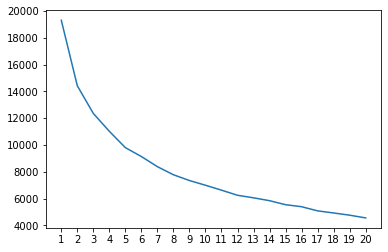

In [85]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

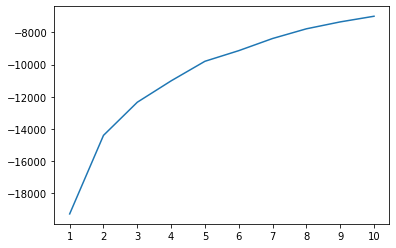

In [86]:
plt.plot(range(1,11),[model.score(df) for model in kmeans[:10]])
plt.xticks(range(1,11));

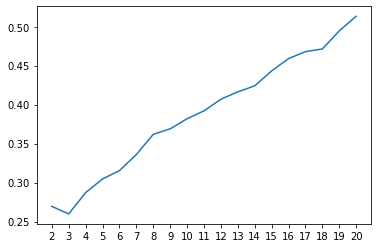

In [87]:
sil = [silhouette_score(df,model.labels_) for model in kmeans[1:]]
plt.plot(range(2,21),sil)
plt.xticks(range(2,21));

**Checking how many clusters DBSCAN sets in.**

In [88]:
dbscan = DBSCAN()
dbscan.fit(df)

DBSCAN()

In [89]:
len(set(dbscan.labels_))

143

143 seems like a lot! 
We can check the plots above and set into a more apropriate value for k so we can try to get some conclusions.

In [90]:
k = 4
kmeans[k].labels_

array([3, 3, 1, ..., 0, 4, 2], dtype=int32)

In [91]:
df

,,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks
Transaction,datetime,,,,,,,,,,
1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0
5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,1,0,0,0,0,0,0,0,0
9681,2017-04-09 14:30:09,1,0,0,0,0,1,0,0,2,0
9682,2017-04-09 14:32:58,2,0,0,1,0,0,0,0,1,0


In [92]:
ind, val = np.where(df.iloc[:,:-1]!=0)
cat = pd.Series(df.columns[val], index=ind)
df["cluster"] = kmeans[k].labels_

In [112]:
df_c = df.reset_index()

In [113]:
cat

0                  bread
1                  bread
2               beverage
2             condiments
2                dessert
              ...       
9528    breakfast_pastry
9528               other
9529            beverage
9529    breakfast_pastry
9530            beverage
Length: 17332, dtype: object

In [114]:
pd.crosstab(cat, df_c["cluster"])

cluster,0,1,2,3,4
row_0,,,,,
beverage,1796,931,1969,541,684
bread,429,247,111,2726,184
breakfast,39,17,55,36,13
breakfast_pastry,459,178,0,310,973
condiments,37,37,77,46,13
dessert,613,1434,6,290,27
kids,9,11,12,10,3
lunch,323,147,460,138,45
other,444,202,911,234,105


There are no distinct clearly spotted clusters on the division above. But there are still some features we have not tried! We have time data! 

However, we must convert it into some categorical form so it is useful. We will use hour and day of the week.

In [115]:
df_c["hour"] = df_c["datetime"].dt.hour
df_c["day"] = df_c["datetime"].dt.dayofweek
df_c.head()

,Transaction,datetime,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,cluster,hour,day
0,1,2016-10-30 09:58:11,0,1,0,0,0,0,0,0,0,0,3,9,6
1,2,2016-10-30 10:05:34,0,2,0,0,0,0,0,0,0,0,3,10,6
2,3,2016-10-30 10:07:57,1,0,0,0,1,1,0,0,0,0,1,10,6
3,4,2016-10-30 10:08:41,0,0,0,1,0,0,0,0,0,0,4,10,6
4,5,2016-10-30 10:13:03,1,1,0,1,0,0,0,0,0,0,4,10,6


In [116]:
df_c = df_c.drop(columns=["Transaction","datetime","cluster"])
df_c.head()

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,hour,day
0,0,1,0,0,0,0,0,0,0,0,9,6
1,0,2,0,0,0,0,0,0,0,0,10,6
2,1,0,0,0,1,1,0,0,0,0,10,6
3,0,0,0,1,0,0,0,0,0,0,10,6
4,1,1,0,1,0,0,0,0,0,0,10,6


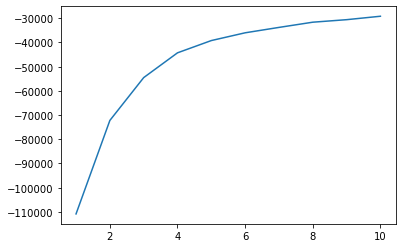

In [117]:
kmeans = [KMeans(i) for i in range(1,11)]
scores = [m.fit(df_c).score(df_c) for m in kmeans]
plt.plot(range(1,11),scores);

In [132]:
k = 4
day = pd.crosstab(df_c["day"],kmeans[k].labels_)
day.index=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
day

col_0,0,1,2,3,4
Mon,650,0,0,485,0
Tue,672,0,0,531,0
Wed,626,0,3,490,2
Thu,0,502,353,153,244
Fri,0,586,469,0,433
Sat,0,814,602,0,652
Sun,0,645,274,0,345


In [133]:
pd.crosstab(df_c["hour"],kmeans[k].labels_)

col_0,0,1,2,3,4
hour,,,,,
1,0,0,1,0,0
7,7,0,9,0,0
8,143,0,232,0,0
9,372,0,635,0,0
10,443,0,824,0,0
11,483,962,0,0,0
12,500,847,0,0,0
13,0,738,0,425,0
14,0,0,0,553,577


In [134]:
df_c["cluster"] = kmeans[k].labels_

In [135]:
df_c["cat"] = cat.groupby(by=cat.index).agg(lambda x: list(x))

In [136]:
df_c.head()

,beverage,bread,breakfast,breakfast_pastry,condiments,dessert,kids,lunch,other,snacks,hour,day,cluster,cat
0,0,1,0,0,0,0,0,0,0,0,9,6,2,[bread]
1,0,2,0,0,0,0,0,0,0,0,10,6,2,[bread]
2,1,0,0,0,1,1,0,0,0,0,10,6,2,"[beverage, condiments, dessert]"
3,0,0,0,1,0,0,0,0,0,0,10,6,2,[breakfast_pastry]
4,1,1,0,1,0,0,0,0,0,0,10,6,2,"[beverage, bread, breakfast_pastry]"


In [137]:
df_c.explode("cat").groupby("cluster").cat.value_counts()

cluster  cat             
0        beverage            1244
         bread                761
         breakfast_pastry     429
         other                339
         dessert              315
         lunch                137
         condiments            36
         breakfast             16
         kids                   6
1        beverage            1545
         bread               1030
         dessert              629
         other                628
         breakfast_pastry     483
         lunch                407
         breakfast             66
         condiments            61
         kids                  12
2        beverage             989
         bread                816
         breakfast_pastry     509
         other                318
         dessert              276
         condiments            44
         lunch                 25
         breakfast             20
         kids                   5
3        beverage            1088
         dessert      

## Further Resources

- [StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ&ab_channel=StatQuestwithJoshStarmer)
- [Data Analysis 6: Principal Component Analysis (PCA) - Computerphile](https://www.youtube.com/watch?v=TJdH6rPA-TI&ab_channel=Computerphile)
- [StatQuest: t-SNE, Clearly Explained](https://www.youtube.com/watch?v=NEaUSP4YerM&feature=youtu.be&ab_channel=StatQuestwithJoshStarmer)
- [Machine Learning - Unsupervised Learning - Density Based Clustering](https://www.youtube.com/watch?v=sJQHz97sCZ0&ab_channel=CognitiveClass)
- [StatQuest: K-means clustering](https://www.youtube.com/watch?v=4b5d3muPQmA&ab_channel=StatQuestwithJoshStarmer)